<a href="https://colab.research.google.com/github/RICHARDKHRISTI/resume-screening-python/blob/main/Resume_Screening_With_Python_RichardKhristi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset shape: (962, 2)

Available Resume Categories:
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Category Distribution:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PM

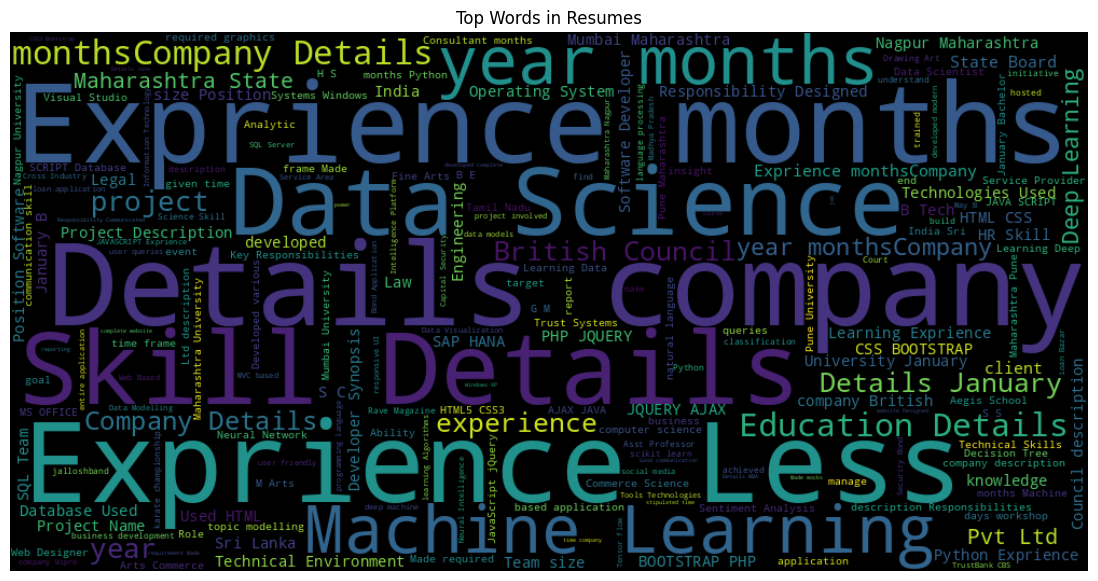


Training Accuracy: 0.99
Testing Accuracy: 0.98

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       0.75      0.60      0.67         5
                 Database       1.00      0.88      0.93         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.0

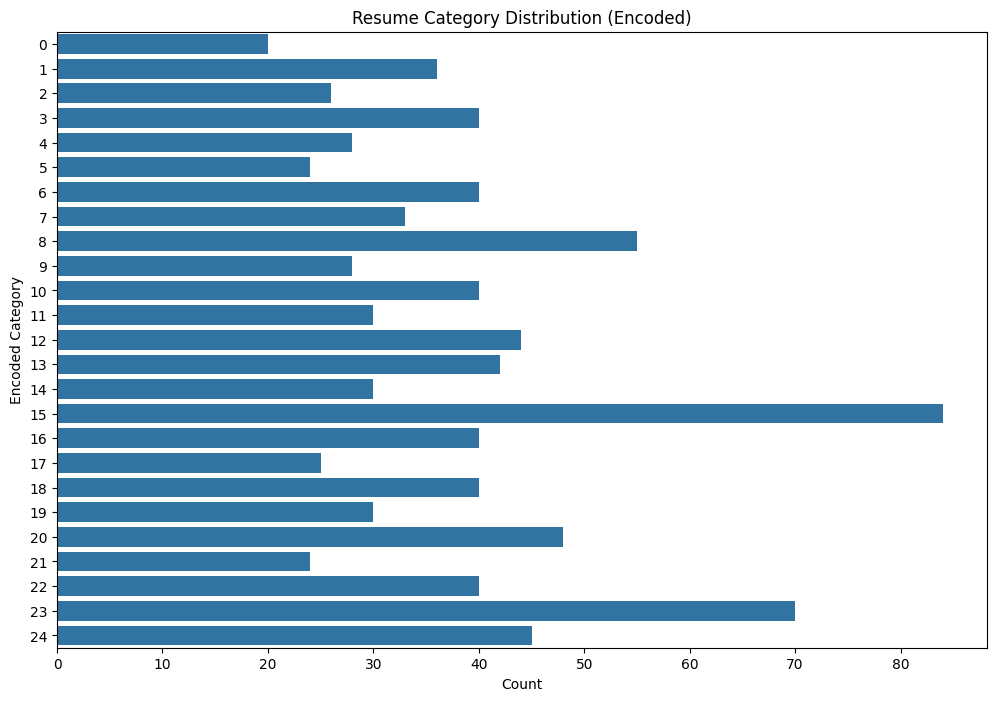

In [5]:
# Resume Screening with Machine Learning - Portfolio Project by Richard Khristi

"""
Project Summary:
Automatically classify resumes into job categories using Python, Machine Learning, and Natural Language Processing.

This end-to-end solution loads a resume dataset, cleans and visualizes data, extracts features using TF-IDF, and trains a One-vs-Rest KNN classifier with over 99% accuracy.

Developed and owned by: Richard Khristi
"""

# Step 1: Import libraries
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Step 2: Download stopwords from nltk
nltk.download('stopwords')

# Step 3: Load the resume dataset
resume_df = pd.read_csv("UpdatedResumeDataSet.csv", encoding='utf-8')
print("Dataset shape:", resume_df.shape)
print("\nAvailable Resume Categories:\n", resume_df['Category'].unique())
print("\nCategory Distribution:\n", resume_df['Category'].value_counts())

# Step 4: Clean the resumes

def clean_resume(text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)
    return text

resume_df['cleaned_resume'] = resume_df['Resume'].apply(lambda x: clean_resume(x))

# Step 5: Generate WordCloud of most used words
all_words = []
combined_text = ""
stopwords_set = set(stopwords.words('english'))

for resume in resume_df['cleaned_resume'][:160]:
    combined_text += resume
    words = resume.lower().split()
    for word in words:
        if word not in stopwords_set and word not in string.punctuation:
            all_words.append(word)

from collections import Counter
print("\nMost Common Words:\n", Counter(all_words).most_common(50))

wc = WordCloud(width=1000, height=500).generate(combined_text)
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words in Resumes")
plt.show()

# Step 6: Encode target labels
le = LabelEncoder()
resume_df['Category'] = le.fit_transform(resume_df['Category'])

# Step 7: Feature extraction with TF-IDF
texts = resume_df['cleaned_resume'].values
labels = resume_df['Category'].values
tfidf = TfidfVectorizer(stop_words='english', max_features=1500)
features = tfidf.fit_transform(texts)

# Step 8: Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 9: Train ML model
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

# Step 10: Evaluate the model
print("\nTraining Accuracy: {:.2f}".format(model.score(X_train, y_train)))
print("Testing Accuracy: {:.2f}".format(model.score(X_test, y_test)))
predictions = model.predict(X_test)

# Step 11: Print classification report
print("\nClassification Report:\n", metrics.classification_report(y_test, predictions, target_names=le.classes_))

# Step 12: Visualize category distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=resume_df)
plt.title("Resume Category Distribution (Encoded)")
plt.xlabel("Count")
plt.ylabel("Encoded Category")
plt.show()





